In [1]:
# Header cell
from __future__ import division
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

# Specific things needed
import time
import math
import sys

# Add parent directory to path
sys.path.append('../code/')
sys.path.append('../sim/')

# Import deft modules
import deft_1d
import simulate_data_1d
import utils

In [2]:
# Simulate data
N = 100
data_type = 'wide'

# Simulate data and get default deft settings
data, defaults = simulate_data_1d.run(data_type,N)

In [3]:
# Deft parameter settings
G = 100
alpha = 3
bbox = [-6,6]

# Do density estimation
results = deft_1d.run(data, G=G, alpha=alpha, bbox=bbox, periodic=False, num_samples=0, print_t=False, tollerance=1E-3)

In [4]:
# Compute true density
xs = results.bin_centers
Q_true = np.zeros(G)
for i, x in enumerate(xs):
    Q_true[i] = eval(defaults['pdf_py'])
Q_true /= results.h*sum(Q_true)

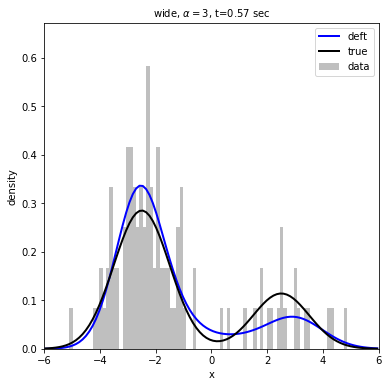

In [5]:
# Plot density estimate

# Make figure and set axis
plt.figure(figsize=[6, 6])
ax = plt.subplot(1,1,1)

# Plot histogram density
left_bin_edges = results.bin_edges[:-1]
plt.bar(left_bin_edges, results.R, \
    width=results.h, linewidth=0, color='gray', zorder=0, alpha=0.5, label='data')

# Plot deft density estimate
plt.plot(xs, results.Q_star, \
    color='blue', linewidth=2, alpha=1, zorder=2, label='deft')

# Plot the true density
plt.plot(xs, Q_true, color='black', linewidth=2, label='true')

# Tidy up the plot
#plt.yticks([])
plt.ylim([0, 2*max(results.Q_star)])
plt.xlim(results.bbox)
t = results.deft_1d_compute_time
plt.title("%s, $\\alpha = %d$, t=%1.2f sec"%(data_type, alpha, t), \
    fontsize=10)
plt.legend()
plt.xlabel('x')
plt.ylabel('density')

# Save plot
plt.savefig('report.test_deft_1d.png')

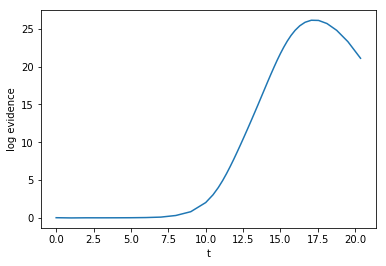

In [6]:
# Plot log evidence ratio against t values
log_Es, ts = results.map_curve.get_log_evidence_ratios()
plt.plot(ts, log_Es)
plt.xlabel('t')
plt.ylabel('log evidence')